# Dog breed App prediction: Random Forests

In [1]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading and Preprocessing Loans Encoded Data

In [2]:
# Loading data
file_path = Path("../sourcedata/dog_breed_val.csv")
dog_breed_val_df = pd.read_csv(file_path)
dog_breed_val_df.head()

,breed_name,description,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,Affenpinscher,The Affen’s apish look has been described many...,148.0,22.86,29.21,3.175147,4.535924,12.0,15.0,0.6,0.6,0.6,0.8,1.0
1,Afghan Hound,"The Afghan Hound is an ancient breed, his whol...",113.0,63.50,68.58,22.679619,27.215542,12.0,15.0,0.8,0.2,0.8,0.2,0.2
2,Airedale Terrier,The Airedale Terrier is the largest of all ter...,60.0,58.42,58.42,22.679619,31.751466,11.0,14.0,0.6,0.4,0.6,1.0,0.8
3,Akita,"Akitas are burly, heavy-boned spitz-type dogs ...",47.0,60.96,71.12,31.751466,58.967008,10.0,13.0,0.8,0.6,0.8,1.0,0.6
4,Alaskan Malamute,The Alaskan Malamute stands 23 to 25 inches at...,58.0,58.42,63.50,34.019428,38.555351,10.0,14.0,0.6,0.6,0.8,0.4,0.8


In [3]:
# Define features set
col_to_drop = ['breed_name','description']
X = dog_breed_val_df.copy()
X.drop(col_to_drop, axis=1, inplace=True)
X.head()

,popularity,min_height,max_height,min_weight,max_weight,min_expectancy,max_expectancy,grooming_frequency_value,shedding_value,energy_level_value,trainability_value,demeanor_value
0,148.0,22.86,29.21,3.175147,4.535924,12.0,15.0,0.6,0.6,0.6,0.8,1.0
1,113.0,63.50,68.58,22.679619,27.215542,12.0,15.0,0.8,0.2,0.8,0.2,0.2
2,60.0,58.42,58.42,22.679619,31.751466,11.0,14.0,0.6,0.4,0.6,1.0,0.8
3,47.0,60.96,71.12,31.751466,58.967008,10.0,13.0,0.8,0.6,0.8,1.0,0.6
4,58.0,58.42,63.50,34.019428,38.555351,10.0,14.0,0.6,0.6,0.8,0.4,0.8


In [4]:
# Define target vector
y = dog_breed_val_df["breed_name"].ravel()
y[:5]

array(['Affenpinscher', 'Afghan Hound', 'Airedale Terrier', 'Akita',
       'Alaskan Malamute'], dtype=object)

In [5]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [6]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [7]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [8]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [9]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [10]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

## Making Predictions Using the Random Forest Model

In [11]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

## Model Evaluation

In [12]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(cm)

#     cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
# )

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [13]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
126,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Accuracy Score : 0.0
Classification Report
                                    precision    recall  f1-score   support

                      Afghan Hound       0.00      0.00      0.00       0.0
                  Airedale Terrier       0.00      0.00      0.00       1.0
                  Alaskan Malamute       0.00      0.00      0.00       1.0
                  American Bulldog       0.00      0.00      0.00       1.0
        American English Coonhound       0.00      0.00      0.00       1.0
               American Eskimo Dog       0.00      0.00      0.00       1.0
            American Leopard Hound       0.00      0.00      0.00       1.0
            Appenzeller Sennenhund       0.00      0.00      0.00       0.0
             Australian Cattle Dog       0.00      0.00      0.00       1.0
                 Australian Kelpie       0.00      0.00      0.00       1.0
                Australian Terrier       0.00      0.00      0.00       1.0
                           Azawakh       0.0

c:\Users\INBA6454\Anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\INBA6454\Anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\INBA6454\Anaconda3\envs\PythonData\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Use

## Feature Importance

In [14]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.12193080975581957, 'popularity'),
 (0.11214920416445497, 'max_weight'),
 (0.10802234367608256, 'min_weight'),
 (0.10319651354728018, 'max_height'),
 (0.10298464938405248, 'min_height'),
 (0.07598893968671407, 'max_expectancy'),
 (0.0681353703614931, 'min_expectancy'),
 (0.06796220595936434, 'trainability_value'),
 (0.06330571554889175, 'demeanor_value'),
 (0.061771135388666874, 'shedding_value'),
 (0.05939291349337688, 'grooming_frequency_value'),
 (0.05516019903380333, 'energy_level_value')]

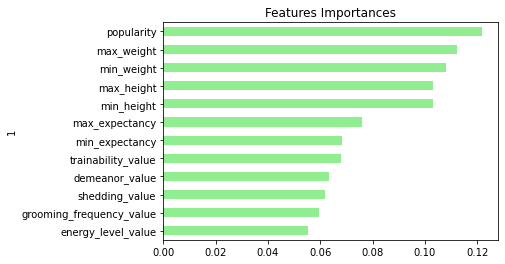

In [15]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [ ]:
git@github.com:TinTesla/Project_4---Group_7.git
git@github.com:TinTesla/Project_4---Group_7.git
